('O2', 0) 0.09794756326699999
('O2', 353) -0.564052436733
('O2', 623) -1.178152436733
('O2', 673) -1.2966524367330001
('O2', 723) -1.416652436733
('O2', 773) -1.537752436733
('O2', 823) -1.660052436733
('N2', 0) 0.1461774393567
('N2', 353) -0.4663225606433
('N2', 623) -1.0415225606433
('N2', 673) -1.1526225606433
('N2', 723) -1.2650225606433
('N2', 773) -1.3784225606433
('N2', 823) -1.4930225606433
('N2O', 0) 0.2862796501057
('N2O', 353) -0.42102034989430004
('N2O', 623) -1.0927203498943001
('N2O', 673) -1.2243203498942998
('N2O', 723) -1.3581203498943002
('N2O', 773) -1.4935203498943
('N2O', 823) -1.6308203498943001
('NO', 0) 0.11803301294959999
('NO', 353) -0.5591669870504
('NO', 623) -1.1888669870504
('NO', 673) -1.3102669870504
('NO', 723) -1.4329669870504
('NO', 773) -1.5567669870504002
('NO', 823) -1.6817669870504002
Working on T = 823
Working on T = 0
Total real modes =  17
Total imaginary modes =  1

Summary 
Imaginary mode =  18 f/i= 654.431169
Temperature = 353
ZPE (eV) =  0.

Working on T = 673
Total real modes =  17
Total imaginary modes =  1

Summary 
Imaginary mode =  18 f/i= 654.431169
Temperature = 723
ZPE (eV) =  0.3695945287760962
q_vib =  1287948372.1504235
Internal energy components at T = 723.00 K:
E_pot                  0.000 eV
E_ZPE                  0.370 eV
Cv_harm (0->T)         0.796 eV
-------------------------------
U                      1.166 eV

Entropy components at T = 723.00 K:
                           S               T*S
S_harm             0.0029086 eV/K        2.103 eV
-------------------------------------------------
S                  0.0029086 eV/K        2.103 eV

Free energy components at T = 723.00 K:
    U          1.166 eV
 -T*S         -2.103 eV
-----------------------
    F         -0.937 eV

Summary
Total imaginary frequencies =  1
i-mode 18 f/i=     654.43
Total real modes =  17
Total imaginary modes =  1

Summary 
Imaginary mode =  18 f/i= 308.148393
Temperature = 723
ZPE (eV) =  0.44682692687559866
q_vib =  17728067

Working on T = 773
Total real modes =  17
Total imaginary modes =  1

Summary 
Imaginary mode =  18 f/i= 654.431169
Temperature = 823
ZPE (eV) =  0.3695945287760962
q_vib =  6910352371.176146
Internal energy components at T = 823.00 K:
E_pot                  0.000 eV
E_ZPE                  0.370 eV
Cv_harm (0->T)         0.933 eV
-------------------------------
U                      1.303 eV

Entropy components at T = 823.00 K:
                           S               T*S
S_harm             0.0030860 eV/K        2.540 eV
-------------------------------------------------
S                  0.0030860 eV/K        2.540 eV

Free energy components at T = 823.00 K:
    U          1.303 eV
 -T*S         -2.540 eV
-----------------------
    F         -1.237 eV

Summary
Total imaginary frequencies =  1
i-mode 18 f/i=     654.43
Total real modes =  17
Total imaginary modes =  1

Summary 
Imaginary mode =  18 f/i= 308.148393
Temperature = 823
ZPE (eV) =  0.44682692687559866
q_vib =  83596010.

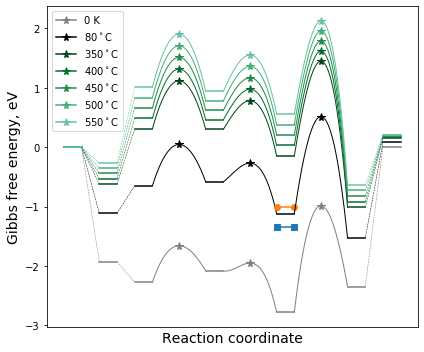

In [7]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed May 15 00:02:56 2019

@author: ark245
"""
import os,sys
import seaborn as sns
import matplotlib.pyplot as plt
from os import environ,sys
from ase import io
import ase.db
from ase.vibrations import Vibrations
import numpy as np
import pickle 
import math
from ase.thermochemistry import HarmonicThermo
from scipy.optimize import fsolve

cm_inv2ev = 0.0001239842573
def fit_cubic(coeff,*data):
    data = data[0]
    #sys.exit()
    x = data[0]
    y = data[1]
    err = []
    a,b,c,d = coeff
    for val_x, val_y in zip(x,y):
        err.append(a*val_x**3 + b*val_x**2 + c*val_x + d - val_y)
    val_x = x[1] # mid value
    val_y = y[1]
    err.append(3*a*val_x**2 + 2*b*val_x + c ) # Derivative must be zero at the mid
    return (err)
    
def get_Tcorr(dict_freq,T,is_ts):
    mode, valuef, neg_valuef = dict_freq

    kb = 8.6173324e-5   # eV / K
    #cm2ev = 8065.5401
    cm_inv2ev = 0.0001239842573

    total_modes_real = 0
    neg_modes = 0
    for n in range(len(mode)):
        if mode[n] == 'f':
            total_modes_real  = total_modes_real + 1
        else :
            neg_modes = neg_modes + 1
    print ("Total real modes = ", total_modes_real)
    if neg_modes > 0:
        print ("Total imaginary modes = ", neg_modes)

    sum = 0.0
    q = 1
    vib_energies = []
    print ("\nSummary ")
    for n in range(len(mode)):
        if n < total_modes_real:
            vib_energies.append(float(valuef[n])*cm_inv2ev + 0j)
            energy_val = float(valuef[n])*cm_inv2ev
            sum = sum + energy_val
            q = q * (1 / (1 - math.exp(- float(energy_val)/kb/T)))
        else:
            print ("Imaginary mode = ", n+1, mode[n], float(neg_valuef[n]))
            vib_energies.append(complex(0,float(neg_valuef[n])*cm_inv2ev))

    sum = sum/2.0 
    print ("Temperature =", T)
    print ("ZPE (eV) = ", sum)
    print ("q_vib = ", q)

    #print vib_energies
    vib_e = 0.0014878111+0j # 12 cm-1
    if is_ts:
        ######################################
        # Deleting the last 'imaginary' mode #
        del vib_energies[-1]                 #
        ######################################
    for n in range(len(vib_energies)):
        if vib_energies[n].real < 0.0014878111:
             vib_energies[n] = vib_e
             print ("Warning: your mode", n, "is smaller than 12 cm-1!!!")
             print ("         Set it to be 12 cm-1 in following calculations")
    # print vib_energies
    #e = float(commands.getoutput("grep '1 F' OSZICAR | awk '{print $5}'"))
    thermo = HarmonicThermo(vib_energies=vib_energies)
    G = thermo.get_helmholtz_energy(temperature=T)

    print ("\nSummary")
    print ("Total imaginary frequencies = ", neg_modes)
    for n in range(len(mode)):
        if n >= total_modes_real:
            print ('i-mode %0d %s %10.2f' %(n+1, mode[n], float(neg_valuef[n])))
    return G 

#####################
##### MAIN CODE #####
#####################
plot_special = True
plot_iso = False
ref_energy_pbe=({'N2':-16.66129942, 'NO':-12.32710365, 'N2O':-21.44294496, 'O2':-9.88984331})
ref_energy_hse=({'N2':-22.897631, 'NO':-19.027291, 'N2O':0.00, 'O2':-17.052391})

data_Tcorr={'O2':[0,-0.662,-1.2761,-1.3946,-1.5146,-1.6357,-1.758],
'N2':[0,-0.6125,-1.1877,-1.2988,-1.4112,-1.5246,-1.6392],
'N2O':[0,-0.7073,-1.379,-1.5106,-1.6444,-1.7798,-1.9171],
'NO':[0,-0.6772,-1.3069,-1.4283,-1.551,-1.6748,-1.7998,]}
ZPE ={'O2':790*cm_inv2ev} 
ZPE.update({'N2':1179*cm_inv2ev})
ZPE.update({'NO':952*cm_inv2ev})
ZPE.update({'N2O':2309*cm_inv2ev})

# All from nist-expt-comparision, except N2O which is ccsd(t)=full
data_T_range = [-273,80,350,400,450,500,550]
colors_seq = {350:'#00441b',
400:'#006d2c',
450:'#238b45',
500:'#41ae76',
550:'#66c2a4',}


ref_Tcorr = {}
for i, gas in enumerate(data_Tcorr.keys()):
    for j, T_deg_C in enumerate(data_T_range):
        T = T_deg_C + 273
        key = (gas,T)
        val = data_Tcorr[gas][j] + ZPE[gas] # Add the zero point energy corrections
        ref_Tcorr.update({key:val})
        print(key,val)

list_zeo = ['MFI_1T', 'MFI_2T'] 
#T_range = [-273,80]
#T_range = [80]
T_range = data_T_range#[1:]

list_names, list_ads, dict_pbe, dict_hse = pickle.load(open("all_mfi_energies.pickle","rb"))
list_names_iso, list_ads_iso, dict_pbe_iso, dict_hse_iso = pickle.load(open("all_mfi_energies_iso.pickle","rb"))
list_names = list_names + list_names_iso
list_ads = list_ads + list_ads_iso
dict_pbe.update(dict_pbe_iso)
dict_hse.update(dict_hse_iso)

name = list_names[1]
list_ads_allowed = []
for key in dict_pbe.keys():
    if key[2] == 'energy' and key[0] == name:
        list_ads_allowed.append(key[1])
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
#fig, ax1 = plt.subplots(figsize=(6,5))

plt.figure(figsize=(6,5))
list_h=[]
list_l=[]
list_volcano = []
list_rate = []
Tcorr_for_CuOCu = []
#T_range = [80]
for j, T_deg_C in enumerate(T_range):
    print ("Working on T = %s" %str(T))
    T = T_deg_C + 273
    kb = 8.617E-5
     
    # Using N2 and O2 as references     
    G_ref_pbe=({'O2':ref_energy_pbe['O2']+float(ref_Tcorr[('O2',T)]), 'N2':ref_energy_pbe['N2']+float(ref_Tcorr[('N2',T)])})
    G_ref_pbe.update({'NO':0.5*(ref_energy_pbe['O2']+ref_energy_pbe['N2'])+float(ref_Tcorr[('NO',T)])})
    G_ref_pbe.update({'N2O':0.5*ref_energy_pbe['O2']+ref_energy_pbe['N2']+float(ref_Tcorr[('N2O',T)])})
    G_ref_pbe_original=({'N2O':ref_energy_pbe['N2O']+float(ref_Tcorr[('N2O',T)])})
    G_ref_pbe_original.update({'NO':ref_energy_pbe['NO']+float(ref_Tcorr[('NO',T)])})

    elec = {}
    Tcorr = {}
    G = {}
    for ads in list_ads_allowed:
        if ads not in elec.keys():
            elec.update({ads:dict_pbe[(name,ads,'energy')]})
            if 'ts' in ads:
                is_ts = True
            else: 
                is_ts = False
            
            if T == 0:
                i_Tcorr = 0
            else:
                i_Tcorr = get_Tcorr(dict_pbe[(name,ads,'freq')],T,is_ts)
            Tcorr.update({ads:i_Tcorr})
            G.update({ads:elec[ads]+Tcorr[ads]})

    G_NO = 0.5*(G_ref_pbe['N2']+G_ref_pbe['O2'])
    G_N2O = G_ref_pbe['N2'] + 0.5*G_ref_pbe['O2']
    
    
    Tcorr_for_CuOCu.append(G['CuOCu'] - G['2Cu'] - 0.5*G_ref_pbe['O2'])
    
    rxn_e = []
    rxn_e.append(G['2Cu'] + 2*G_ref_pbe['NO'])         #0
    rxn_e.append(G['1NO'] + G_ref_pbe['NO'])           #1
    rxn_e.append(G['2NO'])                             #2
    rxn_e.append(G['ts1']      - 0.31)                  #3, reference correction
    rxn_e.append(G['bent_2NO'] - 0.53) #e    #4, reference correction 
    rxn_e.append(G['ts2'])                             #5
    rxn_e.append(G['CuOCu_NNO']) # bound               #6
    #rxn_e.append(G['CuOCu']+G_ref_pbe['N2O']) # N2O(g) (not including)  #7
    rxn_e.append(G['ts3']) # interaction wtih N2O  #7
    rxn_e.append(G['CuOOCu_perp']+G_ref_pbe['N2'])
    rxn_e.append(G['2Cu'] + G_ref_pbe['N2'] + G_ref_pbe['O2'])
    
    # Plot wrt relative values
    rel_e = [val - rxn_e[0] for val in rxn_e ]
    special_val1 = G['CuOCu_NO']+G_ref_pbe['N2O']-G_ref_pbe['NO']-rxn_e[0]
    special_val2 = G['CuOCu_2NO']+G_ref_pbe['N2O']-2*G_ref_pbe['NO']-rxn_e[0]
    
    
    #plt.figure()
    spacing = 0.5
    width = 0.5
    old_end = 0.0 - spacing
    old_val = 0
    index_ts = [3,5,7]
    
    if T == 0:
        my_color = 'grey'
    elif T_deg_C == 80:
        my_color = 'k'
        #print(rel_e)
        #sys.exit()
    else:
        my_color = colors_seq[T_deg_C]
        
        
    for i,val in enumerate(rel_e):
        hori_line_left = old_end + spacing
        hori_line_right = hori_line_left + width
        if i > 0 and i not in index_ts and i not in [val+1 for val in index_ts]: 
            # don't plot the first one. Also don't plot the ones corresponding to index_ts
            plt.plot([old_end,hori_line_left],[old_val, val],'--',color=my_color,lw=0.5)
            
        if i in index_ts:
            h,=plt.plot((hori_line_left+hori_line_right)/2,val,'*-',ms=8,color=my_color)
            # fit a ax3+bx2+cx+d = y to the three points
            x_left = hori_line_left - spacing
            x_right = hori_line_right + spacing
            x_mid = (hori_line_left+hori_line_right)/2
            y_left = rel_e[i-1]
            y_right = rel_e[i+1]
            y_mid = rel_e[i]
            assert val == rel_e[i]           
            x = [x_left, x_mid, x_right]
            y = [y_left,y_mid,y_right]
            #plt.plot(x,y,'ro-') # For testing
 
            coeff0 = np.array([1., 1., 1., 1.])
            data = [x,y]
            out = fsolve(fit_cubic,coeff0,args=data)
            a,b,c,d = out
            coeff = out
            assert np.linalg.norm(fit_cubic(coeff,data)) <= 1E-5
            curve_x = np.linspace(x_left,x_right,100)
            curve_y = a*curve_x**3 + b*curve_x**2 + c*curve_x + d
            plt.plot(curve_x,curve_y,'-',color = my_color, lw = 1)
            
        else: 
            plt.plot([hori_line_left,hori_line_right],[val,val],'-',color=my_color)    
            
        old_val = val
        old_end = hori_line_right
        
        # For legend
        if i == 3:
            list_h.append(h,)
            if T == 0:
                list_l.append('0 K')
            else:
                list_l.append('%s$^\circ$C'% T_deg_C)
            
        # For special
        if i == 6 and plot_special == True and T_deg_C == 80:
            if T_deg_C == 80:
                c1 = '#1f77b4'
                c2 = '#ff7f0e'
            else: 
                c1 = 'grey'
                c2 = 'grey'
            plt.plot([hori_line_left,hori_line_right],[special_val1,special_val1],'-s',color=c1) #CuOCu_NO
            plt.plot([hori_line_left,hori_line_right],[special_val2,special_val2],'-o',color=c2) #CuOCu_2NO
            
        plt.xlabel('Reaction coordinate',fontsize=14)
        plt.ylabel('Gibbs free energy, eV',fontsize=14)
        plt.legend(list_h,list_l)
        ax = plt.gca()
        ax.axes.xaxis.set_ticklabels([])
        ax.axes.xaxis.set_ticks([])


print('DONE')
plt.tight_layout()
plt.xlabel('Reaction coordinate',fontsize=14)
plt.ylabel('Gibbs free energy, eV',fontsize=14)
plt.legend(list_h,list_l)
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
ax.axes.xaxis.set_ticks([])
plt.show()

    
    